In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms.functional as tvF
import torchvision as tv
from torchvision.utils import make_grid
from torchvision.io import read_image
from pathlib import Path


In [2]:
plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = tvF.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

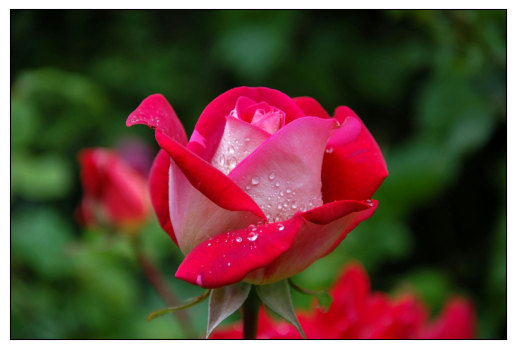

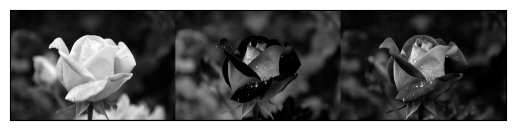

In [3]:
flower_img = read_image(str(Path('../data') / 'flower.jpg'))
show(flower_img)

show(make_grid(torch.permute(flower_img.reshape(1,*flower_img.shape),(1,0,2,3))))

/var/folders/8v/r6tfrh3s0y16r9dl8fzkgdgw0000gp/T/ipykernel_79185/3435520246.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  flower_img = torch.tensor(flower_img,dtype=torch.float32)


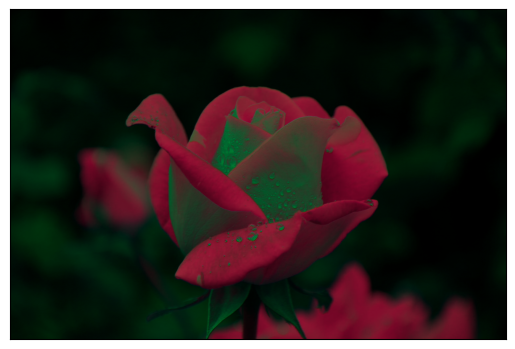

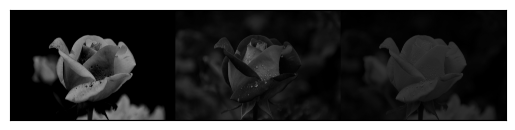

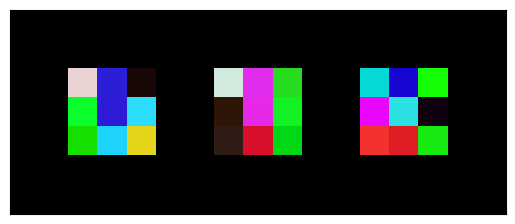

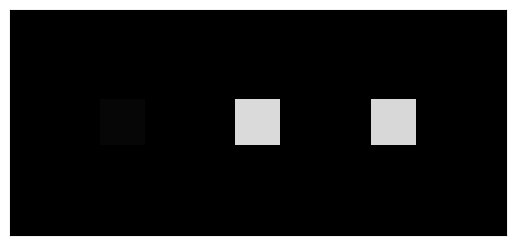

In [18]:
class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.conv1 = nn.Conv2d(3,3,3)
    def forward(self,x):
        return F.relu(self.conv1(x))


model = Model()

flower_img = torch.tensor(flower_img,dtype=torch.float32)
out = model(flower_img)
out.shape

out_flower = out.to(torch.uint8)
show(out_flower)
show(make_grid(torch.permute(out_flower.reshape(1,*out_flower.shape),(1,0,2,3))))
show(make_grid(model.conv1.weight))
show(make_grid(model.conv1.bias.reshape(3,1,1,1)))

In [5]:
for p in model.parameters():
    print(p.shape)

torch.Size([3, 3, 3, 3])
torch.Size([3])


In [19]:
pms = list(model.parameters())
# from chpl_tensor import save_tensor
import chpl_tensor
chpl_tensor.save_tensor(pms,'mini_cnn_params.chdata')

In [20]:
for p in model.parameters():
    print(p)

Parameter containing:
tensor([[[[-0.0937,  0.1679,  0.0984],
          [ 0.0465,  0.1777,  0.1705],
          [ 0.0931,  0.1213, -0.1035]],

         [[-0.1768,  0.1207,  0.0299],
          [-0.0090,  0.1090, -0.1433],
          [-0.1286, -0.1791, -0.1786]],

         [[-0.1772, -0.1648,  0.0270],
          [ 0.1736, -0.1630, -0.0209],
          [-0.0023, -0.0255,  0.1080]]],


        [[[-0.1807, -0.1239,  0.1456],
          [ 0.1828, -0.1023,  0.0726],
          [ 0.1850, -0.1574,  0.0021]],

         [[-0.0914,  0.1756, -0.1384],
          [ 0.0856,  0.1619, -0.0596],
          [ 0.1136,  0.0594, -0.1609]],

         [[-0.1371, -0.0766,  0.1181],
          [ 0.0245, -0.0947,  0.1428],
          [ 0.0786,  0.1661,  0.0839]]],


        [[[ 0.0225,  0.0860,  0.0895],
          [-0.1003,  0.1584,  0.0645],
          [-0.0535, -0.1352,  0.0909]],

         [[-0.1486,  0.0246, -0.0169],
          [ 0.0288, -0.1225,  0.0046],
          [ 0.1922,  0.1178, -0.0878]],

         [[-0.1762, -0

In [22]:
from chpl_tensor import save_tensor
save_tensor(flower_img,'../data/flower.chdata')